In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.shape

(148, 7)

In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Handling rating 

In [8]:
df['rate']

0      4.1/5
1      4.1/5
2      3.8/5
3      3.7/5
4      3.8/5
       ...  
143    3.3/5
144    3.3/5
145    4.0/5
146    3.0/5
147    3.9/5
Name: rate, Length: 148, dtype: object

In [10]:
def handle_rating(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handle_rating)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of serving event in resturant')

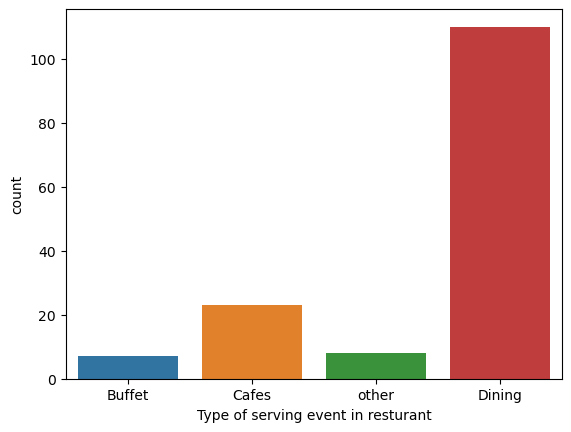

In [12]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of serving event in resturant')

# Conclusion

The majority of the resturants serve in dining style.

[Text(0.5, 1.0, 'Resturants types vs Votes')]

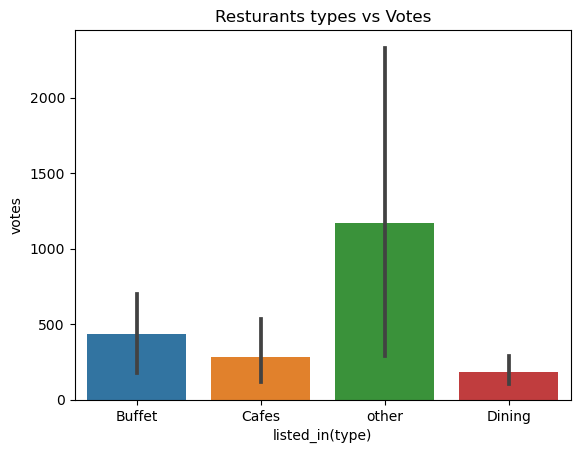

In [16]:
sns.barplot(x=df['listed_in(type)'],y=df['votes']).set(title='Resturants types vs Votes')

C:\Users\Dell\AppData\Local\Temp\ipykernel_6696\1821299877.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x=df['listed_in(type)'], y= df['votes'], ci=0).set(title='Votes of each resturant type')


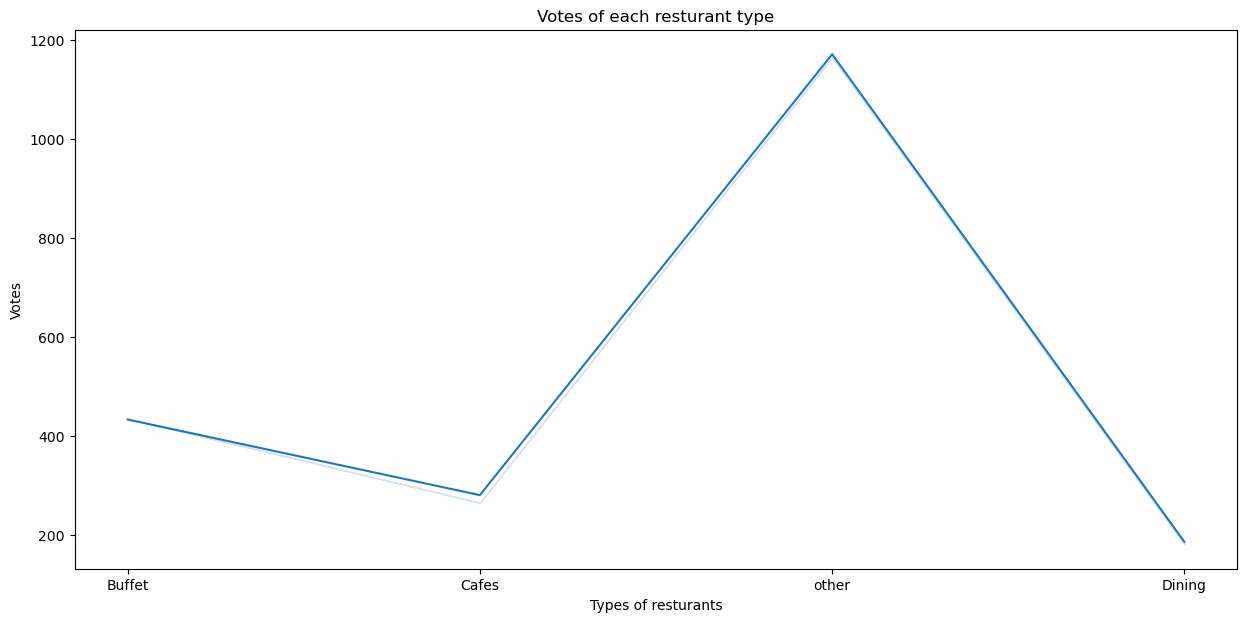

In [13]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df['listed_in(type)'], y= df['votes'], ci=0).set(title='Votes of each resturant type')
plt.xlabel('Types of resturants')
plt.ylabel('Votes')
plt.show()

# Conclusion

There are more votes for resturants having other types of services.

Text(0, 0.5, 'Votes')

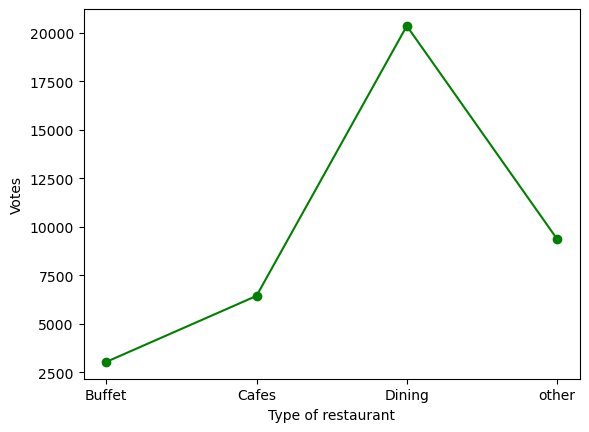

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant")
plt.ylabel("Votes")

In [18]:
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

# Conclusion

People prefer dining type resturants more.

In [21]:
# resturant with most votes

max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

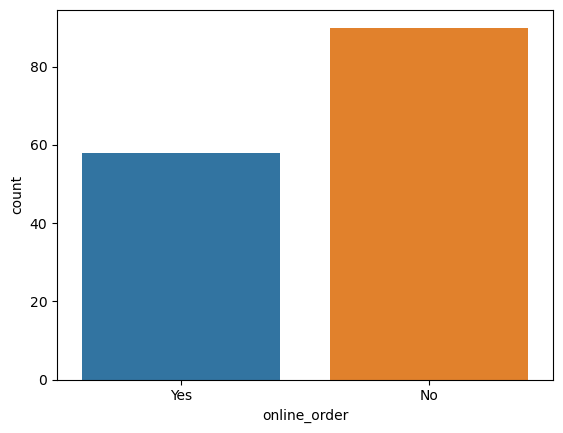

In [23]:
sns.countplot(x=df['online_order'])

# Conclusion

People mostly order offline

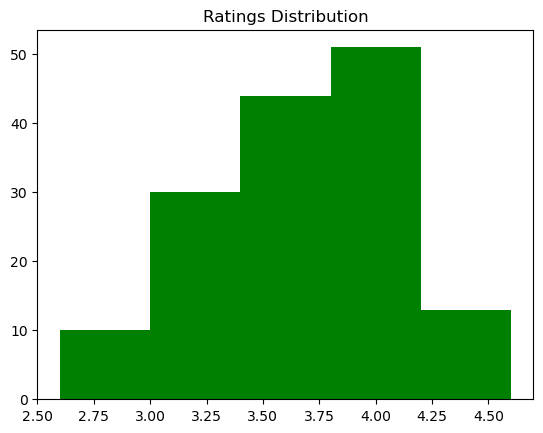

In [25]:
plt.hist(df['rate'],bins=5, color= 'green')
plt.title("Ratings Distribution")
plt.show()

# Conclusion

Most resturant have rating of 3.5 to 4.0

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

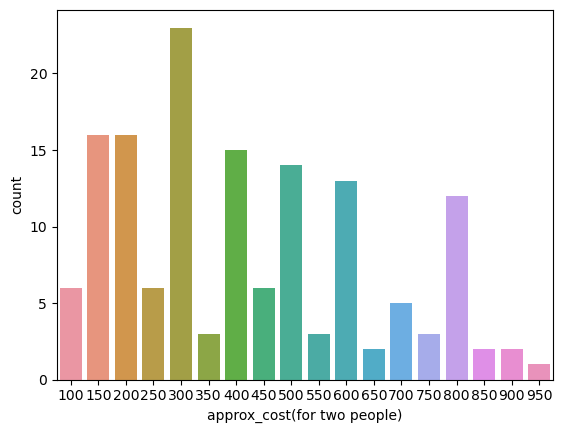

In [26]:
sns.countplot(x=df['approx_cost(for two people)'])

# Conclusion

People prefer couple package of 300 more.

<Axes: xlabel='online_order', ylabel='rate'>

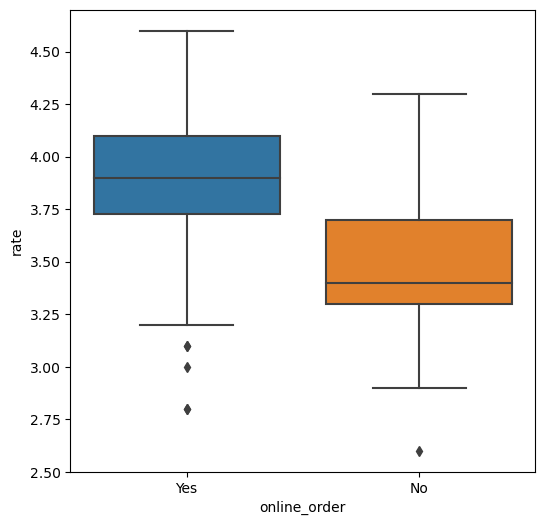

In [27]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

<Axes: xlabel='book_table', ylabel='rate'>

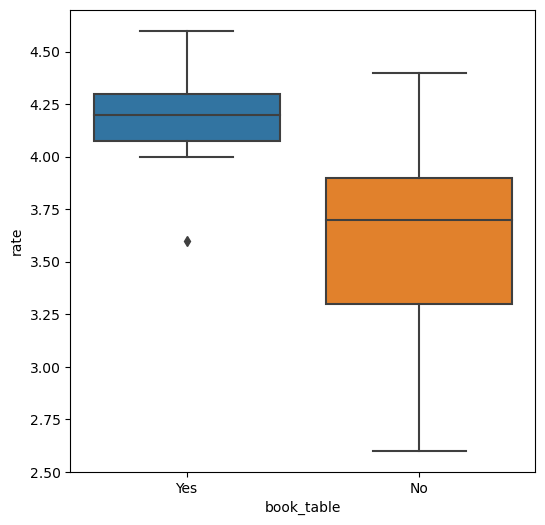

In [28]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

# Conclusion

People prefer online order more than offline order.

People prefer booking table for reservations than to not.

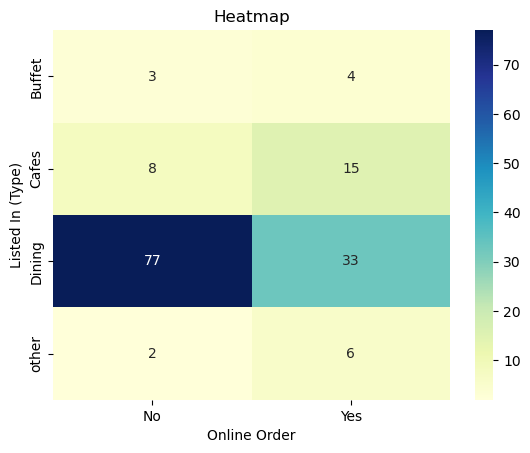

In [29]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# CONCLUSION

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.